In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd '/gdrive/MyDrive/Bank_app/'

/gdrive/MyDrive/Bank_app


## Mở File

In [ ]:
df = pd.read_csv('data.csv', encoding='utf-8')
df.head()

,Bank,review_text,review_score
0,HDBank,Stupid bank app without help on how to generat...,1
1,HDBank,High fees. And money sometimes just disappear ...,1
2,HDBank,Unable to login by password and unable to logi...,4
3,HDBank,"Whenever I choose transfer money option, the a...",3
4,HDBank,I can not run this app recently. It crashes al...,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17533 entries, 0 to 17532
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bank          17533 non-null  object
 1   review_text   17533 non-null  object
 2   review_score  17533 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 411.1+ KB


In [ ]:
df.review_text[:10]

0    Stupid bank app without help on how to generat...
1    High fees. And money sometimes just disappear ...
2    Unable to login by password and unable to logi...
3    Whenever I choose transfer money option, the a...
4    I can not run this app recently. It crashes al...
5    Can login the internet banking using laptop, b...
6                                 Nice and easy to use
7           The app is much better now. It works well.
8                                      App login crash
9                                 Dislike these colour
Name: review_text, dtype: object

## Xử Lý Văn Bản

In [ ]:
!pip install import-ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c104186f0cada2ce70abaeff4299ddc76997109b27a024b8f84d3fc989dee801
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from lib import *

importing Jupyter notebook from lib.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langdetect import detect

In [ ]:
def check_is_en(text):
    try:
        language = detect(text)
    except:
        language = "error"
    return (language == 'en')

In [ ]:
# xét dữ liệu tiếng anh
df['english'] = df.review_text.apply(lambda x: 1 if check_is_en(x) else 0)
print('Số review sử dụng tiếng anh là chính:', df[df.english == 1].shape[0])
df[df.english == 1].head()

Số review sử dụng tiếng anh là chính: 2696


,Bank,review_text,review_score,english
0,HDBank,Stupid bank app without help on how to generat...,1,1
1,HDBank,High fees. And money sometimes just disappear ...,1,1
2,HDBank,Unable to login by password and unable to logi...,4,1
3,HDBank,"Whenever I choose transfer money option, the a...",3,1
4,HDBank,I can not run this app recently. It crashes al...,3,1


# Vì số lượng reviews sử dụng tiếng Anh rất lớn nên em sẽ tách ra làm bài toán riêng

In [ ]:
df_en = df[df.english == 1]
df_en.shape

(2696, 4)

In [ ]:
df_en.to_csv('df_en.csv', index = False)

In [ ]:
df_vi = df[df.english == 0]
df_vi.shape

(14837, 4)

In [ ]:
from emoticons import EMOTICONS_EMO
final_ko_list = ['không có', 'không nhanh', 'không được', 'không thích', 'không bao giờ', 'không hiểu', 'không chậm', 'không nên', 'không hợp', 'không nhiều', 'không vào được', 'không gửi',
                 'không cập nhật', 'không đúng', 'không thân thiện', 'không dễ', 'không phù hợp', 'không cho', 'không ra gì', 'không xảy ra', 'không mở', 'không nhập được',
                 'không rẻ', 'không thuận tiện', 'không kém', 'không hài lòng', 'không phải', 'không thể', 'không nhận được', 'không xong', 'không tìm được', 'không ra', 'không đắt']

In [ ]:
# import emoji dictionary
emojicon_dict = {}
emojicon_file = open("emojicon.txt")
for line in emojicon_file:
    key, value = line.split('\t')
    emojicon_dict[key] = value.replace('\n', '')

# import file teencode
teencode_dict = {}
teencode_file = open("teencode.txt")
for line in teencode_file:
    key, value = line.split('\t')
    teencode_dict[key] = value.replace('\n', '')

### Gắn nhãn dữ liệu với 2 thang:
- Review_score >= 4: target 1 (Like)
- Review_score <= 3: target 0 (Dislike)

In [ ]:
# phân loại điểm với 2 thang:
df_vi['target'] = df_vi.review_score.apply(lambda x: 1 if x >= 4 else 0)
df_vi.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Bank,review_text,review_score,english,target
10,HDBank,So far so good,5,0,1
12,HDBank,"Quá tệ, liên tục bị lỗi kết nối tới server bị ...",1,0,0
13,HDBank,App của một ngân hàng có tham vọng mà để xảy r...,1,0,0
14,HDBank,"app ngân hàng thuộc top cùi nhất thị trg, mỗi ...",1,0,0
15,HDBank,Mình dùng app để thanh toán vé máy bay và vé x...,5,0,1


In [ ]:
df_vi[df_vi['target'] != 1].tail()

,Bank,review_text,review_score,english,target
17357,TPBank Mobile,Đăng ký tài khoản lỗi đã làm làm nhiều lần ko đc,1,0,0
17358,TPBank Mobile,"App cứ báo địa chỉ không hợp lệ, không cho đăn...",1,0,0
17363,TPBank Mobile,"App gì đâu mà cứ bảo trì với lỗi suốt, cứ mỗi ...",1,0,0
17369,TPBank Mobile,- Chưa thể xoá được danh sách những tài khoản ...,3,0,0
17387,TPBank Mobile,"Quảng cáo cho đăng ký tài khoản online, nhưng ...",1,0,0


In [ ]:
df_vi[['review_text', 'target']].groupby(['target']).count()

,review_text
target,
0,8331
1,6500


Nhận xét: Dữ liệu không có sự chênh lệch lớn.

In [ ]:
# xử lý emoticon, emoji, viết tắt/ viết kiểu đặc biệt, dấu câu
df_vi.review_text = df_vi.review_text.apply(lambda x: convert_emoticons(x, EMOTICONS_EMO))
df_vi.review_text = df_vi.review_text.apply(lambda x: convert_emoji(x, emojicon_dict))
df_vi.review_text = df_vi.review_text.apply(lambda x: convert_teencode(x, teencode_dict))
df_vi.review_text = df_vi.review_text.apply(lambda x: remove_special_icons(x))
df_vi.review_text = df_vi.review_text.apply(lambda x: convert_khong_words(x, final_ko_list))
df_vi.review_text = df_vi.review_text.apply(lambda x: clean_text(x))
df_vi.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Bank,review_text,review_score,english,target
10,HDBank,so far so good,5,0,1
12,HDBank,quá tệ liên tục bị lỗi kết nối tới server bị g...,1,0,0
13,HDBank,app của một ngân hàng có tham vọng mà để xảy r...,1,0,0
14,HDBank,app ngân hàng thuộc top cùi nhất thị trg mỗi l...,1,0,0
15,HDBank,mình dùng app để thanh toán vé máy bay và vé x...,5,0,1
16,HDBank,sao vì dịch vụ chuyển tiền qua app chưa miễn p...,1,0,0
17,HDBank,đề nghị coi lại quy trình đặt lại mật khẩu mới...,1,0,0
18,HDBank,trải nghiệm tệ nhất với credit card của hd ban...,1,0,0
19,HDBank,ok,5,0,1
20,HDBank,rất tiện lợi,5,0,1


In [ ]:
# loại dữ liệu không có ý nghĩa
print(df_vi.shape)
df_vi = df_vi[df_vi.review_text !=  '']
df_vi = df_vi[df_vi.review_text !=  ' ']
print(df_vi.shape)

(14837, 5)
(14831, 5)


## Tokenize

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 2.7 MB/s 
     |████████████████████████████████| 235 kB 50.5 MB/s 
     |████████████████████████████████| 965 kB 48.2 MB/s 
     |████████████████████████████████| 581 kB 50.1 MB/s 


In [ ]:
from underthesea import word_tokenize

In [ ]:
df_vi['review_text_wt'] = df_vi['review_text'].apply(lambda x: word_tokenize(x, format='text'))
df_vi[['review_text', 'review_text_wt']].head(10)

,review_text,review_text_wt
10,so far so good,so far so good
12,quá tệ liên tục bị lỗi kết nối tới server bị g...,quá tệ liên_tục bị lỗi kết_nối tới server bị g...
13,app của một ngân hàng có tham vọng mà để xảy r...,app của một ngân_hàng có tham_vọng mà để xảy r...
14,app ngân hàng thuộc top cùi nhất thị trg mỗi l...,app ngân_hàng thuộc top cùi nhất thị trg mỗi l...
15,mình dùng app để thanh toán vé máy bay và vé x...,mình dùng app để thanh_toán vé máy_bay và vé x...
16,sao vì dịch vụ chuyển tiền qua app chưa miễn p...,sao vì dịch_vụ chuyển tiền qua app chưa miễn_p...
17,đề nghị coi lại quy trình đặt lại mật khẩu mới...,đề_nghị coi lại quy_trình đặt lại mật_khẩu mới...
18,trải nghiệm tệ nhất với credit card của hd ban...,trải_nghiệm tệ nhất với credit card của hd ban...
19,ok,ok
20,rất tiện lợi,rất tiện_lợi


In [ ]:
df_vi.to_csv('processed_data.csv', index=False)

In [ ]:
# create a stop words list
stop_words_file = 'vietnamese-stopwords.txt'
with open(stop_words_file, 'r', encoding='utf-8') as file:
  stop_words = file.read()

stop_words = stop_words.split('\n')

## Feature selection

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# split data to train and test set
x = df_vi.review_text_wt
y = df_vi.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# create bag of words
vectorizer = TfidfVectorizer(analyzer='word', stop_words=stop_words)
vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train).toarray()

In [ ]:
# sử dụng chi-square statistic để lựa chọn các từ liên quan đến thuộc tính target
from sklearn.feature_selection import chi2

In [ ]:
# tính chi2
chi2, p = chi2(x_train, y_train)

In [ ]:
# chọn p-value để lấy số lượng nhỏ các từ có mối quan hệ đáng kể với biến target
X_names = vectorizer.get_feature_names()
p_value_limit = 0.80
df_features = pd.DataFrame()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p}))
df_features = df_features.sort_values(["score"], ascending=False)
df_features = df_features[df_features["score"]>p_value_limit]

X_names = df_features["feature"].unique().tolist()
print("Selected features:", len(df_features))
print("Top features:", ", ".join(df_features["feature"].values[:12]))

Selected features: 877
Top features: nhanh_chóng, ok, tuyệt_vời, báo, bảo_mật, lỗi, tiện_lợi, good, không, tệ, acb, thích


In [ ]:
# save list
with open('selected_features.txt', 'w') as f:
  print(X_names, file=f)

In [ ]:
# áp dụng list từ df_features ở trên để sử dụng cho tf-idf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
vectorizer2 = TfidfVectorizer(vocabulary = X_names)
vectorizer2.fit(x_train)
x_train = vectorizer2.transform(x_train).toarray()
x_test = vectorizer2.transform(x_test).toarray()
dic_vocabulary = vectorizer2.vocabulary_

## Áp dụng mô hình ML


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
import time

In [ ]:
def score_model(model, x_train, x_test, y_train, y_test):
    # print('Applying', model.__class__.__name__)
    start = time.time()
    model.fit(x_train, y_train)
    duration = time.time()-start
    score_test = model.score(x_test, y_test)
    score_f1 = f1_score(y_test, model.predict(x_test))
    auc_roc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    # print('Done', model.__class__.__name__)
    return score_test, score_f1, auc_roc, duration

In [ ]:
models = [LogisticRegression(),
          MultinomialNB(),
          BernoulliNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          SVC(probability=True)]
scores = []
names = []
for model in models:
    scores.append(score_model(model, x_train, x_test, y_train, y_test))
    names.append(model.__class__.__name__)
results = pd.DataFrame(scores, columns=['Test Accuracy', 'F1 Score', 'AUC-ROC', 'Time Fit'])
results.insert(0, 'Model', pd.Series(names))

In [ ]:
results

,Model,Test Accuracy,F1 Score,AUC-ROC,Time Fit
0,LogisticRegression,0.901798,0.886817,0.950009,0.625306
1,MultinomialNB,0.888989,0.864880,0.949610,0.049541
2,BernoulliNB,0.879326,0.865716,0.941513,0.114061
3,KNeighborsClassifier,0.799551,0.780512,0.884926,0.009263
4,DecisionTreeClassifier,0.844270,0.828253,0.855731,4.473930
5,RandomForestClassifier,0.886292,0.870456,0.943042,9.194668
6,XGBClassifier,0.835506,0.789534,0.908207,18.316882
7,SVC,0.901798,0.885692,0.945822,223.414538


Lựa chọn Logistic Regression (LR) vì có Test Accuracy,	F1 Score,	AUC-ROC khá cao. SVC() cũng có Test Accuracy,	F1 Score,	AUC-ROC xấp xỉ LR nhưng thời gian thực thi quá lâu.

## Logistic Regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lr.score(x_train, y_train)

0.9115692129852615

In [ ]:
lr.score(x_test, y_test)

0.9017977528089888

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2500
           1       0.90      0.88      0.89      1950

    accuracy                           0.90      4450
   macro avg       0.90      0.90      0.90      4450
weighted avg       0.90      0.90      0.90      4450



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2301,  199],
       [ 238, 1712]])

In [ ]:
target_names = ['dislike - 0', 'like - 1']

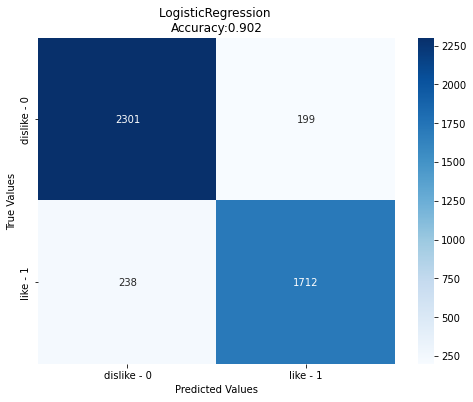

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = lr.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.950008923076923

In [ ]:
from sklearn.metrics import roc_curve

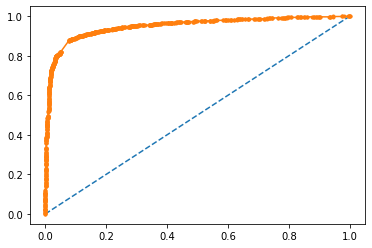

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

# Model dự đoán khá tốt.

## Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# parameter tuning
grid_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C': [10, 1.0, 0.1, 0.01]}
 
lr_tun = RandomizedSearchCV(LogisticRegression(), grid_params, scoring='f1_macro', n_jobs=-1)
lr_tun.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [10, 1.0, 0.1, 0.01],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='f1_macro')

In [ ]:
print(lr_tun.best_score_)
print(lr_tun.best_params_)

0.8981850696547383
{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


In [ ]:
test_score, f1, aucroc, time_ = score_model(LogisticRegression(C=10, penalty='l2', solver='liblinear'), x_train, x_test, y_train, y_test)
print('Test score:', test_score)
print('F1 score:', f1)
print('AUC-ROC score:', aucroc)
print('Performance time:', time_)

Test score: 0.8946067415730337
F1 score: 0.8794034456158395
AUC-ROC score: 0.9511160000000001
Performance time: 0.13581132888793945


In [ ]:
lr_tun = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_tun.fit(x_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [ ]:
y_pred = lr_tun.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2500
           1       0.88      0.88      0.88      1950

    accuracy                           0.89      4450
   macro avg       0.89      0.89      0.89      4450
weighted avg       0.89      0.89      0.89      4450



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2271,  229],
       [ 240, 1710]])

Kết quả không tốt hơn LogisticRegression mặc định

# Lựa chọn model LogisticRegression mặc định để dự đoán vì dự đoán khá tốt.

In [ ]:
import pickle

In [ ]:
with open('bank_app_LogisticRegression_vnm.pkl', mode = 'wb') as pkl:
  pickle.dump(lr, pkl)

In [ ]:
with open('Count_tfidf_vnm.pkl', mode = 'wb') as pkl:
  pickle.dump(vectorizer2, pkl)